# Done by kaveh karimadini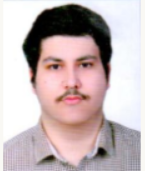

In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_excel('digi_output.xlsx')

In [3]:
np.set_printoptions(suppress=True)# for displaying data frame better

In [4]:
pd.set_option('display.float_format', str)

In [5]:
df

,Unnamed: 0,product_id,selling_price,Expense
0,0,300,835348496.5,405740698.3
1,1,996,2016350.0,979370.0000000001
2,2,997,5157950.0,2505290.0
3,3,1188,69370000.0,33694000.0
4,4,1336,28649180.0,13915316.0
...,...,...,...,...
23716,23716,954627,5586000.0,2713200.0
23717,23717,955126,11599000.0,5633800.0
23718,23718,955358,4088000.0,1985600.0
23719,23719,956044,1151500.0,559300.0


In [6]:
df.drop(columns=['Unnamed: 0'],inplace = True)

In [7]:
df.columns

Index(['product_id', 'selling_price', 'Expense'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23721 entries, 0 to 23720
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     23721 non-null  int64  
 1   selling_price  23721 non-null  float64
 2   Expense        23721 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 556.1 KB


In [9]:
hesab = df[['selling_price','Expense']]

In [10]:
hesab

,selling_price,Expense
0,835348496.5,405740698.3
1,2016350.0,979370.0000000001
2,5157950.0,2505290.0
3,69370000.0,33694000.0
4,28649180.0,13915316.0
...,...,...
23716,5586000.0,2713200.0
23717,11599000.0,5633800.0
23718,4088000.0,1985600.0
23719,1151500.0,559300.0


In [11]:
idd = df[['product_id']]

## scaling the data between 0 to 100

In [13]:
num = ['selling_price','Expense']
scaler = MinMaxScaler((0,100))
Profit_num = scaler.fit_transform(hesab)
Profit_num = pd.DataFrame(data = Profit_num)

## changing back the column names

In [14]:
def change_name_columns(df_old):
    need = ['selling_price','Expense']
    df_old.columns=need
    return df_old
Profit_num = change_name_columns(Profit_num)
Profit_num.head()

,selling_price,Expense
0,1.9093302495909474e-06,1.909330249590947e-06
1,4.5747910331178285e-09,4.5747910331178285e-09
2,1.1755576958319476e-08,1.1755576958319474e-08
3,1.5852568927953938e-07,1.5852568927953936e-07
4,6.544971171439114e-08,6.544971171439113e-08


## Elbow method

Text(0, 0.5, 'WCSS')

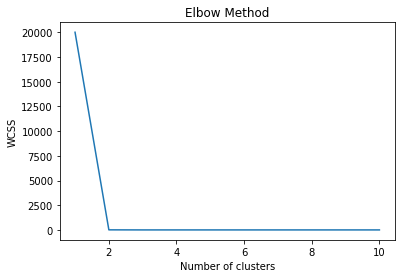

In [15]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(Profit_num)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
#plt.show()

# kmeans++ with k clusters defined in the elbow method

In [16]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++')
Profit_kmeans = kmeans.fit_predict(Profit_num)

In [17]:
y_kmeans=Profit_kmeans

In [19]:
Profit_Kpi = pd.DataFrame(data = Profit_kmeans)

In [20]:
def change_name_columns(df_old):
    need = ['kpi_label']
    df_old.columns=need
    return df_old
#Profit_Kdf = change_name_columns(Profit_Kdf)
#Profit_Kdf.head()
kpi_profit = change_name_columns(Profit_Kpi)
kpi_profit.head()

,kpi_label
0,0
1,0
2,0
3,0
4,0


In [21]:
idd['kpi_label'] = kpi_profit[['kpi_label']]

<ipython-input-21-75ebfd5dc67d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idd['kpi_label'] = kpi_profit[['kpi_label']]


In [22]:
idd

,product_id,kpi_label
0,300,0
1,996,0
2,997,0
3,1188,0
4,1336,0
...,...,...
23716,954627,0
23717,955126,0
23718,955358,0
23719,956044,0


0    23720
1        1
Name: kpi_label, dtype: int64

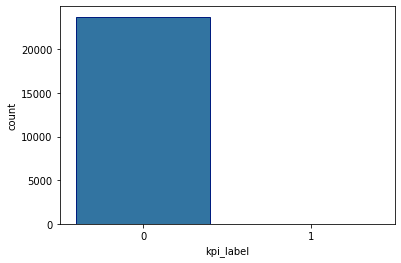

In [23]:
sns.countplot(x='kpi_label',data=idd ,edgecolor=sns.color_palette("dark"))
idd.kpi_label.value_counts()

In [48]:
idd.to_excel('result_kpi.xlsx')

In [35]:
X = Profit_num.values

C:\Users\kaveh karimadini\.conda\envs\100days\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kaveh karimadini\.conda\envs\100days\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kaveh karimadini\.conda\envs\100days\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an erro

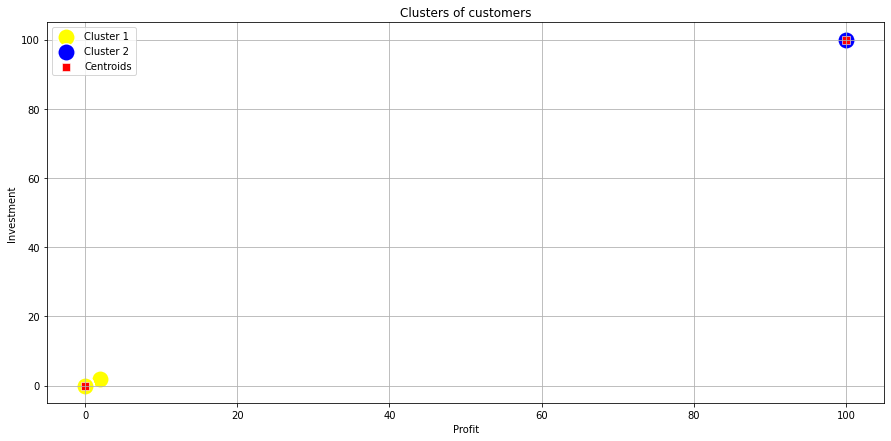

In [40]:
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=300)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=300)
#sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
#sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
#sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)

sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red',label = 'Centroids',s=50,marker=',')

plt.grid()
plt.title('Clusters of customers')
plt.xlabel('Profit')
plt.ylabel('Investment')
plt.legend()

# Multivariant regression
* in multivariant case the independent variables have some relations with each other
\
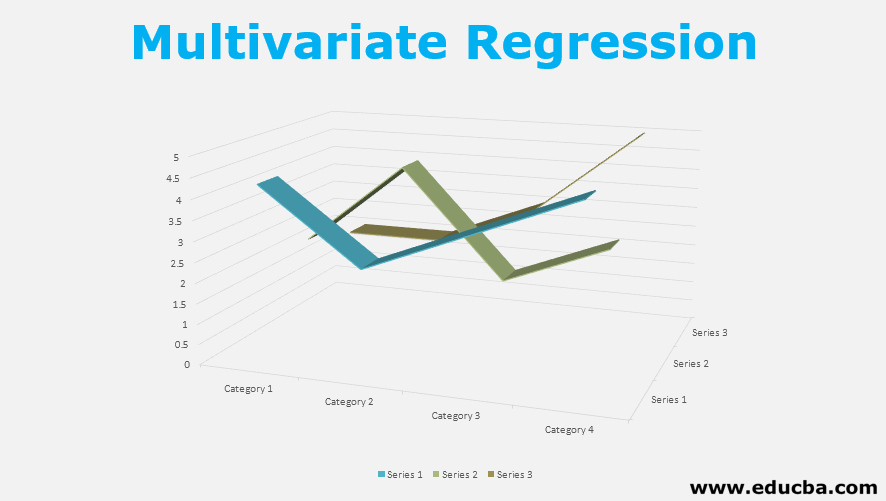

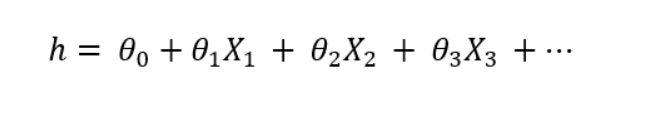

* theta 0 is the bias term and all other are coefficients

#### cost function:
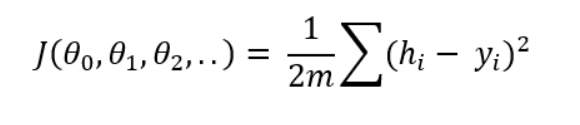

## gradient descent:
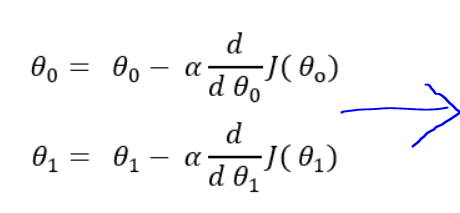
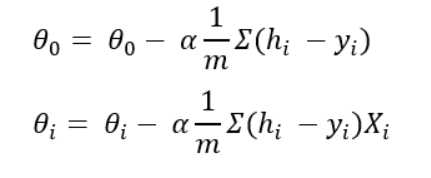